# Question 1. Heapsort in Ascending Order

In [14]:
#a) Heapify Operation
def maxHeapify(arr, n, i): #P > C rule to starting from node i
    l = i * 2 + 1 #0-base
    r = i * 2 + 2
    
    if l < n and arr[l] > arr[i]: #n = current heap size
        largest = l
    else:
        largest = i
    if r < n and arr[r] > arr[largest]:
        largest = r
        
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i] ###
        maxHeapify(arr, n, largest)

In [15]:
#b) Build Max Heap
def maxHeapBuild(arr, n):
    for i in range(n//2 - 1, -1, -1):
        maxHeapify(arr, n, i)

In [16]:
#c) Heapsort Algorithm 
def maxHeapsort(arr, n):
    maxHeapBuild(arr, n) 
    for i in range(n - 1, 0, -1): #pseudo code len(arr)-1, 0(not included)
        arr[0], arr[i] = arr[i], arr[0]
        n -= 1 #decrease heap size by -1
        maxHeapify(arr, n, 0)

In [17]:
A = [5, 2, 7, 6, 0, 8, 3, 4, 9, 1]
maxHeapify(A, len(A), 0)
print(A)

[7, 2, 8, 6, 0, 5, 3, 4, 9, 1]


In [18]:
A = [5, 2, 7, 6, 0, 8, 3, 4, 9, 1] 
#if using the result from above, will lead to different result
maxHeapBuild(A, len(A))
print(A)

[9, 6, 8, 5, 1, 7, 3, 4, 2, 0]


In [19]:
A = [5, 2, 7, 6, 0, 8, 3, 4, 9, 1]
maxHeapsort(A, len(A))
print(A)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
#d) Time Analysis
import numpy as np
import time
import matplotlib.pyplot as plt

In [23]:
def maxHeapsortTime(values, sizes):
    time_sort = []
    for i, j in zip(values, sizes): #using zip
        arr = np.random.randint(i, size= j)
    
        start = time.time()
        maxHeapsort(arr, len(arr))
        finish = time.time()
        
        time_sort.append(finish-start)
    return time_sort

def displayGraph(sizes, result):
    plt.plot(sizes, result, label="Heap Sort")
    
    plt.xlabel("Sizes of Arrays")
    plt.ylabel("Heap Sorting Time")
    
    plt.legend()
    plt.show()

In [25]:
sizes = [1000, 100000, 1000000]
values = [10000, 1000000, 10000000] 

result = maxHeapsortTime(values, sizes)
print("Heapsort Time: ", end='')
print(result)

Heapsort Time: [0.004001140594482422, 0.7503507137298584, 9.005678415298462]


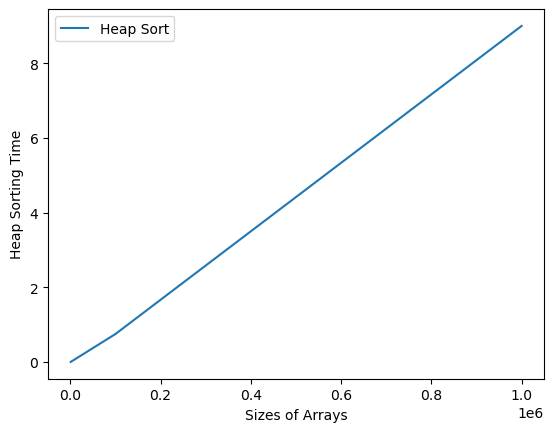

In [26]:
displayGraph(sizes, result)

# Question 2. Heapsort in Descending Order

In [30]:
def minHeapify(arr, n, i): #P < C rule to starting from node i
    l = i * 2 + 1 #0-base
    r = i * 2 + 2
    
    if l < n and arr[l] < arr[i]: #n = current heap size
        smallest = l
    else:
        smallest = i
    if r < n and arr[r] < arr[smallest]:
        smallest = r
        
    if smallest != i:
        arr[i], arr[smallest] = arr[smallest], arr[i] ###
        minHeapify(arr, n, smallest)

In [31]:
def minHeapBuild(arr, n):
    for i in range(n//2-1, -1, -1):
        minHeapify(arr, n, i)

In [32]:
def minHeapsort(arr, n):
    minHeapBuild(arr, n) 
    for i in range(n-1, 0, -1): #pseudo cpde len(arr)-1, 0(not included)
        arr[0], arr[i] = arr[i], arr[0]
        n -= 1 #decrease heap size by -1
        minHeapify(arr, n, 0)

In [33]:
B = [5, 2, 7, 6, 0, 8, 3, 4, 9, 1]
minHeapify(B, len(B), 0)
print(B)

[2, 0, 7, 6, 1, 8, 3, 4, 9, 5]


In [36]:
B = [5, 2, 7, 6, 0, 8, 3, 4, 9, 1]
minHeapBuild(B, len(B))
print(B) #value 0 relocated at root

[0, 1, 3, 4, 2, 8, 7, 6, 9, 5]


In [35]:
B = [5, 2, 7, 6, 0, 8, 3, 4, 9, 1]
minHeapsort(B, len(B))
print(B)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


# Question 3. Priority Queue Implementation

In [74]:
class MaxHeap:
    def __init__(self):
        self.heap = []
        
    def show_heap(self):
        return (self.heap)
    #    
    def size_len(self):
        return len(self.heap)
    
    def is_empty(self):
        return len(self.heap) == 0
     #   
    def find_max(self):
        """ Returns the maximum element in the heap """
        if len(self.heap) == 0:
            return None
        return self.heap[0] #returns the root element
        
    def extract_max(self):
        """ Removes and returns the maximum element from the heap """
        if len(self.heap) == 0:
            return None
        max_element = self.heap[0]
        # Move the last element to the root and heapify down
        self.heap[0] = self.heap[-1]
        self.heap.pop()  # Remove the last element (shrink length)
        maxHeapify(self.heap, len(self.heap), 0) #OR self._heapify_down(0) #Re-establish heap starting from root
        return max_element
    #
    def insert(self, val):
        """ Inserts a new value into the heap """
        self.heap.append(val)
        self._heapify_up(len(self.heap) - 1) #move up the last inserted elem to correct place
    
    def _heapify_up(self, index): #same as increase key value
        """ Maintains the max heap property by moving the element at `index` up """
        parent = (index - 1) // 2 #careful with parent node index calculation
        print(self.heap, end='->')
        while parent >= 0 and self.heap[parent] < self.heap[index]:
            # Swap the current element with its parent
            self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
            # repeat till it reaches root or not p < c anymore
            index = parent
            parent = (index - 1) // 2
        print(self.heap)
    #
    # def _heapify_down(self, index): #same as maxHeapify
    #     """ Maintains the max heap property by moving the element at `index` down """
    #     left = index * 2 + 1
    #     right = index * 2 + 2
    #     largest = index
        
    #     if left < len(self.heap) and self.heap[left] > self.heap[largest]:
    #         largest = left
    #     if right < len(self.heap) and self.heap[right] > self.heap[largest]:
    #         largest = right
            
    #     if largest != index:
    #         # Swap and continue heapifying down
    #         self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
    #         self._heapify_down(largest) #re-establish max heap rule starting from the node

In [76]:
# Example usage:
pq = MaxHeap()
print(pq.is_empty()) #checks if the heap is empty

pq.insert(3) #inserting 3, 5, 9, 6, 8
print(pq.show_heap())
pq.insert(5)
print(pq.show_heap())
pq.insert(9)
print(pq.show_heap())
pq.insert(6)
print(pq.show_heap())
pq.insert(8)
print(pq.show_heap())

print(pq.extract_max()) #pops root
print(pq.find_max()) #returns new root
print(pq.show_heap())

True
[3]->[3]
[3]
[3, 5]->[5, 3]
[5, 3]
[5, 3, 9]->[9, 3, 5]
[9, 3, 5]
[9, 3, 5, 6]->[9, 6, 5, 3]
[9, 6, 5, 3]
[9, 6, 5, 3, 8]->[9, 8, 5, 3, 6]
[9, 8, 5, 3, 6]
9
8
[8, 6, 5, 3]
